In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  9 02:39 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


In [3]:
 !unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


In [4]:
!ls -l

total 147308
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Mar 21 13:22 drive
drwxr-xr-x 1 root root      4096 Mar 18 13:36 sample_data


In [6]:
import numpy as np
import pandas as pd

DF= pd.read_csv('creditcard.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
DF.drop('Time', axis=1, inplace=True)
DF.head(
  
)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
DF = DF.values

In [11]:
DF

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]])

In [12]:
X = DF[:,:-1]
y=DF[:,-1]
X.shape, y.shape

((284807, 29), (284807,))

In [13]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.distplot(DF['Amount'])
plt.show()

IndexError: ignored

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

In [20]:
from tensorflow.keras import models, layers

In [27]:
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_shape=(29,)))
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 25)                750       
_________________________________________________________________
dense_3 (Dense)              (None, 18)                468       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 19        
Total params: 1,237
Trainable params: 1,237
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])
History = model.fit(X_train, y_train, 
                    epochs=15, batch_size=10, 
                    validation_data=(X_test, y_test))

Epoch 1/15
19937/19937 [==============================] - 33s 2ms/step - loss: 0.0054 - recall: 0.7391 - val_loss: 0.0027 - val_recall: 0.8581
Epoch 2/15
19937/19937 [==============================] - 33s 2ms/step - loss: 0.0038 - recall: 0.7308 - val_loss: 0.0030 - val_recall: 0.8378
Epoch 3/15
19937/19937 [==============================] - 33s 2ms/step - loss: 0.0042 - recall: 0.7490 - val_loss: 0.0031 - val_recall: 0.8311
Epoch 4/15
19937/19937 [==============================] - 33s 2ms/step - loss: 0.0045 - recall: 0.7397 - val_loss: 0.0030 - val_recall: 0.7500
Epoch 5/15
19937/19937 [==============================] - 34s 2ms/step - loss: 0.0041 - recall: 0.7519 - val_loss: 0.0029 - val_recall: 0.8176
Epoch 6/15
19937/19937 [==============================] - 33s 2ms/step - loss: 0.0041 - recall: 0.7113 - val_loss: 0.0038 - val_recall: 0.8176
Epoch 7/15
19937/19937 [==============================] - 33s 2ms/step - loss: 0.0038 - recall: 0.7458 - val_loss: 0.0033 - val_recall: 0.8176

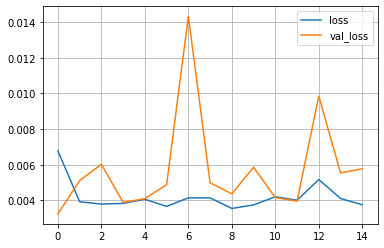

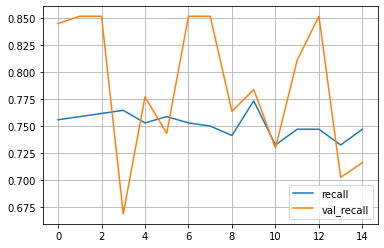

In [38]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()
plt.show()

plt.plot(History.history['recall'])
plt.plot(History.history['val_recall'])
plt.legend(['recall','val_recall'])
plt.grid()
plt.show()

In [41]:
model1 = models.Sequential()
model1.add(layers.Dense(25, activation='relu', input_shape=(29,)))
model1.add(layers.Dense(18, activation='relu'))
model1.add(layers.Dense(1, activation='softmax'))
model1.summary()

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])
History1 = model1.fit(X_train, y_train, 
                    epochs=15, batch_size=10, 
                    validation_data=(X_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 25)                750       
_________________________________________________________________
dense_9 (Dense)              (None, 18)                468       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 19        
Total params: 1,237
Trainable params: 1,237
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
19937/19937 [==============================] - 34s 2ms/step - loss: 0.0922 - recall: 0.4984 - val_loss: 0.0039 - val_recall: 0.8311
Epoch 2/15
19937/19937 [==============================] - 33s 2ms/step - loss: 0.0088 - recall: 0.5908 - val_loss: 0.0034 - val_recall: 0.8311
Epoch 3/15
19937/19937 [==============================] - 33s 2ms/step - loss: 0.0061 - recall: 

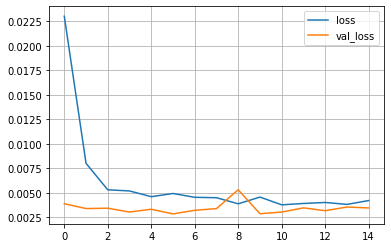

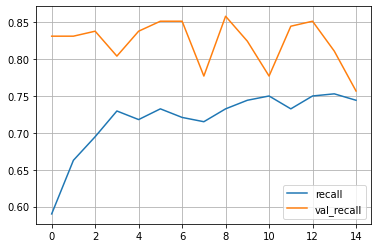

In [42]:
plt.plot(History1.history['loss'])
plt.plot(History1.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()
plt.show()

plt.plot(History1.history['recall'])
plt.plot(History1.history['val_recall'])
plt.legend(['recall','val_recall'])
plt.grid()
plt.show()

In [43]:
loss, recall = model.evaluate(X_test, y_test)
loss, recall

2671/2671 [==============================] - 2s 923us/step - loss: 0.0058 - recall: 0.7162


(0.0057732039131224155, 0.7162162065505981)

In [44]:
loss, recall = model1.evaluate(X_test, y_test)
loss, recall

2671/2671 [==============================] - 3s 948us/step - loss: 0.0035 - recall: 0.7568


(0.003469641087576747, 0.7567567825317383)